## Mechanical Mathematic course 565
author: shahin1009

Complex value lecture series by prof steve brunton
https://www.youtube.com/watch?v=NZ25MQ5W2eA

In [1]:
import numpy as np
from numpy.fft import fft2, fftshift, ifft2
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
%matplotlib inline 
# %matplotlib widget
from scipy import ndimage
import math
from scipy.fft import fft, fftfreq

In [13]:
#  intergration of the Cauchy integral
R = 1
N = 1000
I = 0
dTheta = 2 * np.pi / N

for k in range(N):
    theta = 2*np.pi*k/N
    z = R * np.exp(1j*theta)
    dz = 1j * R * np.exp(1j*theta) * dTheta
    f = np.cos(z)/z
    I = I + f * dz
    
print(I)
    
    


(-1.6765153718414916e-16+6.283185307179591j)


In [14]:
2 * np.pi

6.283185307179586

(200, 200)


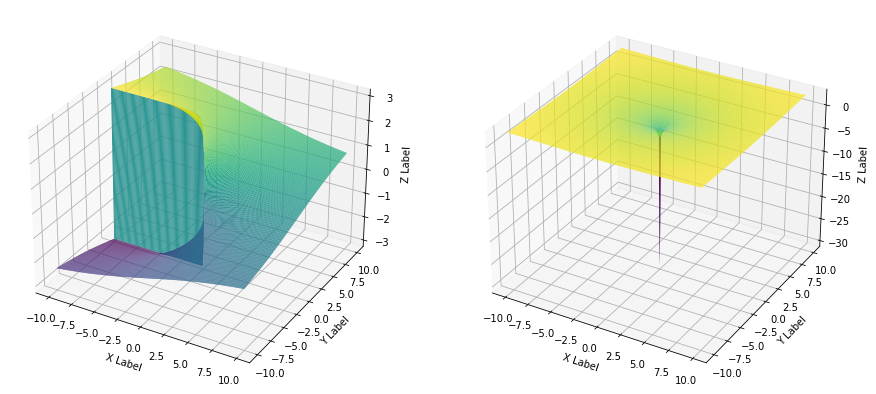

In [15]:
# Log(z) function visualization
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1, 2, 1, projection='3d')
x = y = np.arange(-10.0, 10, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.log(X + 1j*Y)
print(Z.shape)

surf  = ax.plot_surface(X, Y, Z.imag, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z.real, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


(200, 99)


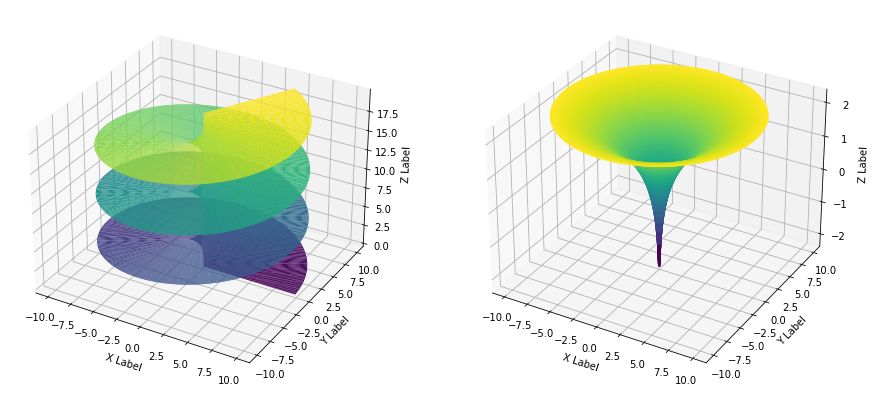

In [16]:
#visiualizing the the log spiral
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1, 2, 1, projection='3d')
r  = np.arange(0.1, 10, 0.1)
th = np.arange(0, 20 , 0.1)
R, TH = np.meshgrid(r, th)
X = R * np.cos(TH)
Y = R * np.sin(TH)
Z = np.log(R) + 1j * TH
print(Z.shape)

surf  = ax.plot_surface(X, Y, Z.imag, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z.real, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [17]:
import scipy.integrate as integrate

import scipy.special as special

### cheking the integral result of 1/(x**4 + a**4)

In [18]:
#result should be:
np.pi/np.sqrt(2)

2.221441469079183

In [19]:
#using scipy.integrate.quad:
result = integrate.quad(lambda x: 1/(x**4 + 1**4), -np.inf, np.inf)
result

(2.2214414690791835, 4.477661847338604e-09)

In [20]:
#using numpy
def integral_approximation(f, a, b):
    return (b-a)*np.mean(f)# Integrate f(x) = x^2

def f1(x):
    return 1/(x**4 + 1**4)# Define bounds of integral

a = -10000
b = 10000# Generate function values
x_range = np.arange(a,b+0.001,.001)
fx = f1(x_range)# Approximate integral
approx = integral_approximation(fx,a,b)
approx

2.2214413575538763

## 11th section
heat transfer numerical solution

In [21]:
L = 10
x_range = np.arange(0,L , 1)
x_range

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Iteration 50
Iteration 100
Iteration 150
Iteration 200
Iteration 250
Iteration 300
Iteration 350
Iteration 400
Iteration 450
Iteration 500
Iteration 550
Iteration 600
Iteration 650
Iteration 700
Iteration 750
Iteration 800
Iteration 850
Iteration 900
Iteration 950
Iteration 1000


Text(0.5, 1.0, 'Simplest default with labels')

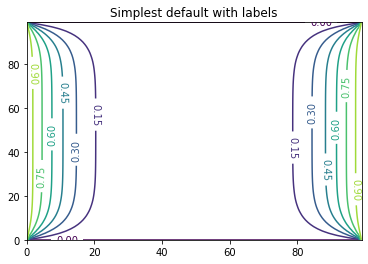

In [22]:
L = 100
H = 100
x_range = np.arange(0,L , 1)
y_range = np.arange(0,H , 1)
u = np.zeros((L,H))
iteration = 0
# Boundary conditions
u[0,:] = 0
u[L-1,:] = 0
u[:,0] = 1
u[:,H-1] = 1

# other conditions
# u[:,0] = 1
# u[:,H-1] = np.sin(2*np.pi*x_range/L)

while iteration < 1000:
    iteration += 1
    if iteration % 50 == 0:
        print(f'Iteration {iteration}')
        
        #use this to save countour plot every 50 iterations
        # fig, ax = plt.subplots()
        # cs = ax.contourf(x_range, y_range, u, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
        # cbar = fig.colorbar(cs)
        # plt.savefig(f'{iteration}.png')


    # it's important to copy the array before changing it
    ### usisng Lu = u won't work because the array will be changed
    Lu = u.copy()
    # ---------------------------------------------------------------
    # option 1: 5 point stencil
    for i in range(1,L-1):
        for j in range(1,H-1):
            Lu[i , j] = 1* (-4*u[i,j] + u[i,j+1] + u[i-1,j] + u[i+1,j] + u[i,j-1])
            
    # option 2: 8 point stencil
    # for i in range(1,L-1):
    #     for j in range(1,H-1):
    #         Lu[i , j] = (-8*u[i,j] + u[i,j+1] + u[i-1,j] + u[i+1,j] + u[i,j-1] + u[i-1,j-1] + u[i-1,j+1] + u[i+1,j-1] + u[i+1,j+1])
    # ---------------------------------------------------------------
    u[1:L-1,1:H-1] = u[1:L-1,1:H-1] + 0.1 * Lu[1:L-1,1:H-1]
    
# plot the result 
fig, ax = plt.subplots()
CS = ax.contour(x_range, y_range, u)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')


### Analytic solution to the heat equation

Text(0.5, 1.0, 'Simplest default with labels')

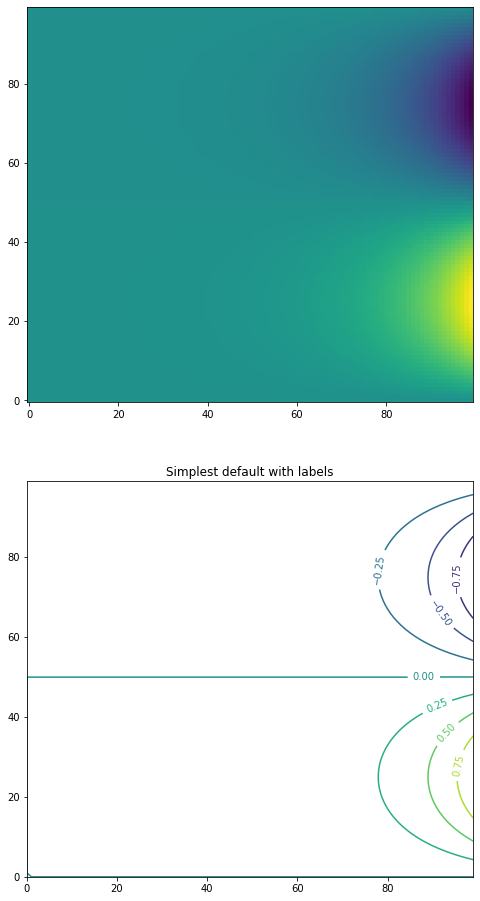

In [23]:
L = 100
H = 100
u = np.zeros((L,H))
x_range = np.arange(0,L , 1)
y_range = np.arange(0,H , 1)
x , y = np.meshgrid(x_range, y_range)

BC = np.sin(2 * np.pi * y_range / L)
A2 = (2/(H*np.sinh(2*np.pi*L/H))) * np.sum(BC**2)
u = A2 * (np.sin(2*np.pi*y/H) * np.sinh(2*np.pi*x/L))


fig, ax = plt.subplots(2 , figsize=(8,16))
CS = ax[0].pcolormesh(x, y, u)

CS = ax[1].contour(x, y, u)
ax[1].clabel(CS, inline=True, fontsize=10)
ax[1].set_title('Simplest default with labels')


### solution for a nastier BC

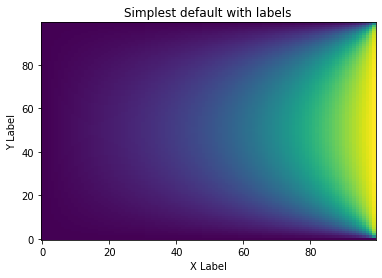

In [24]:
L = 100
H = 100
u = np.zeros((L,H))
x_range = np.arange(0,L , 1)
y_range = np.arange(0,H , 1)
x , y = np.meshgrid(x_range, y_range)

BC = np.ones([H])

# k shouldn't be zero
for k in range(1 , 100):
    AK = (2/(H*np.sinh(k *np.pi*L/H))) * np.sum(BC*np.sin(k * np.pi * y_range / H))
    u = u + AK * np.sin(k * np.pi * y / H) * np.sinh(k * np.pi * x / L)

fig , ax = plt.subplots()
ax.pcolormesh(x, y, u)
ax.set_title('Simplest default with labels')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.show()

### section 12: fourier transform
http://www.youtube.com/watch?v=ENrQNiXfaLk

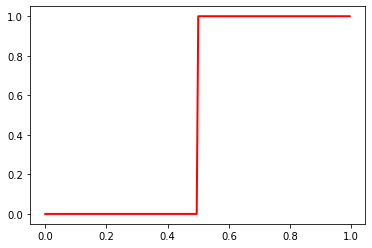

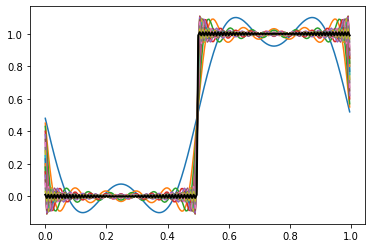

In [25]:
# furier transform
dx = 0.005
L = 1
x = np.arange(0,L , dx)

# step function
f = np.ones(len(x))
f[0:len(x)//2] = 0

# sin function
# f = np.sin(x)
plt.plot(x,f , 'r' , label='f(x)' , linewidth=2)
plt.show()

fFS = np.zeros(len(x))
A0 = (2/(L)) * np.sum(f) * dx* np.ones(len(x))


for m in range(1,100):
    fFS = A0/2
    
    for k in range(1,m):
        AK = (2/(L)) * np.sum(f * np.cos(2 * k * np.pi * x / L)) * dx
        BK = (2/(L)) * np.sum(f * np.sin(2 * k * np.pi * x / L)) * dx
        fFS = fFS + AK * np.cos(2*k*np.pi*x/L) + BK * np.sin(2*k*np.pi*x/L)

    
    if m % 5 == 0:
        plt.plot(x,fFS)
        
plt.plot(x,fFS , color='black' , label='fFS(x)' , linewidth=2)
plt.show()

### Section 16: Discrete Fourier Transform

http://www.youtube.com/watch?v=KTj1YgeN2sY

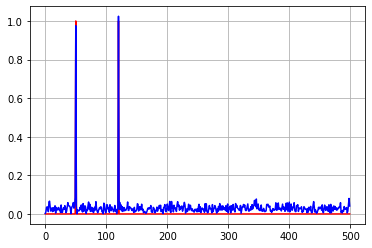

In [26]:

dt = 0.001
t = np.arange(0,1 , dt)
N = len(t)
x = np.linspace(0.0, N*dt, N, endpoint=False)

# original data
y = np.sin(2*np.pi*50*x)+np.sin(2*np.pi*120*x) # w1 = 50 , w2 = 120
# noisy data
y2 = y + 0.5*np.random.randn(N)

yf = fft(y)
yf2 = fft(y2)
xf = fftfreq(N, dt)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), 'r-')
plt.plot(xf, 2.0/N * np.abs(yf2[0:N//2]), 'b-')
plt.grid()
plt.show()

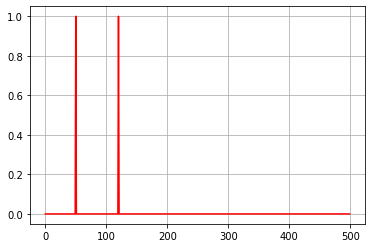

In [38]:
# Filter the noisy data
b = 2.0/N * np.abs(yf2[0:N]) > 0.2
plt.plot(xf, b , 'r-')
plt.grid()
plt.show()

# discreet fourier transform

http://www.youtube.com/watch?v=4d6EeRJZLbo

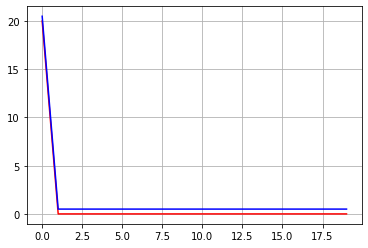

In [84]:
N = 20
# T = 1
# x = np.linspace(0.0, N*T, N)
x = np.ones((N , 1))
yf = fft2(x)

w = np.exp(-1j*2*np.pi/N)
DFT = np.zeros((N,N) , dtype=complex)
# slow version
for i in range(0,N):
    for j in range(0,N):
        DFT[i,j] = w**(i*j)
a = np.dot(DFT,x)
plt.plot(yf.real, 'r-')
# shift the plot for better visualization
plt.plot(a.real+0.5, 'b-')
plt.grid()
plt.show()

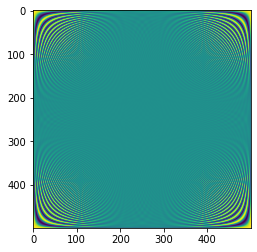

In [29]:
N = 500

I , J = np.meshgrid(np.arange(0,N , 1), np.arange(0,N , 1))
w = np.exp(-1j*2*np.pi/N)
DFT = w**(I*J)

plt.imshow(DFT.real)
plt.show()

## Image compression with DFT (section 18)
http://www.youtube.com/watch?v=R-Qcd-a-DGA

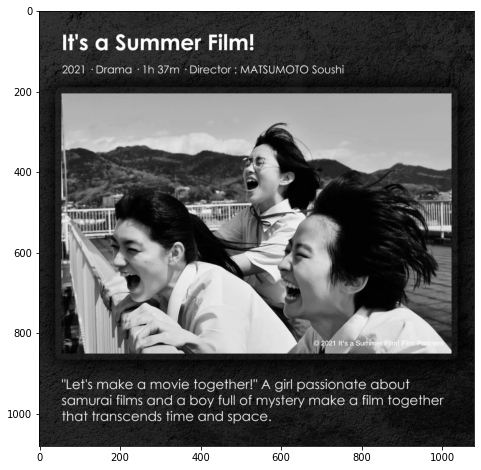

In [3]:
from PIL import Image
I = Image.open('C:/Users/shahi/Downloads/summer.jpg')
I = I.convert('L')
A3 = np.asarray(I, dtype = np.float32) 

H,W = np.shape(A3)
hW = int(np.fix(0.5*W))
hH = int(np.fix(0.5*H))
plt.figure(figsize=(8,8))
plt.imshow(A3, cmap = 'gray')

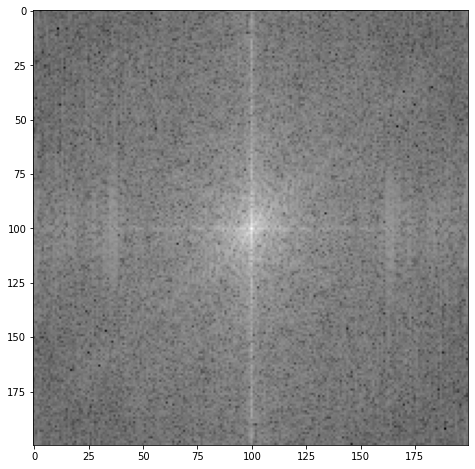

In [64]:
F3 = fft2(A3)/(W*H)                          
F3 = fftshift(F3)
P3 = np.abs(F3)
r = 100
a = np.log(P3[hH-r:hH+r,hW-r:hW+r])
plt.figure(figsize=(8,8))
plt.imshow(a , cmap = 'gray')

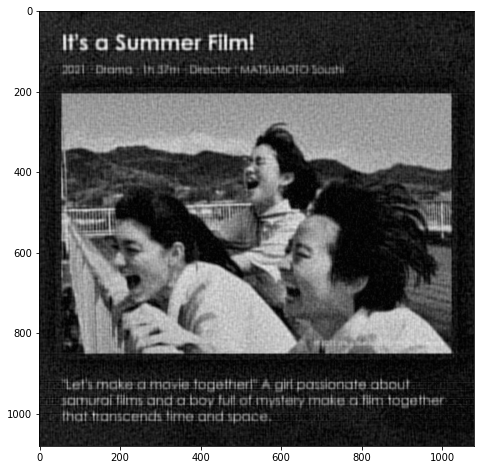

In [71]:
T = 0.1
c = F3 * (P3 >= T)
fM = ifft2(c)*W*H
plt.figure(figsize=(8,8))
plt.imshow(np.abs(fM), cmap = 'gray')

In [72]:
out1 = np.count_nonzero(F3)
out2 = np.count_nonzero(c)
out1/out2

57.99811048679827

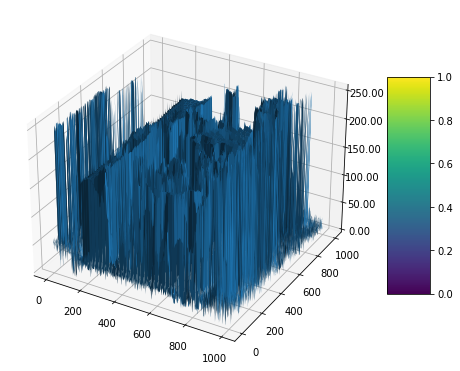

In [9]:
r = 500
A4 = A3[hH-r:hH+r,hW-r:hW+r]
xx, yy = np.mgrid[0:A4.shape[0], 0:A4.shape[1]]

fig, ax = plt.subplots(subplot_kw={"projection": "3d"} , figsize=(8,8))

surf = ax.plot_surface(xx, yy, A4,)
ax.zaxis.set_major_formatter('{x:.02f}')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()